In [24]:
import torch
import torch.nn.functional as F
from torch import nn,optim
from torchvision import transforms
from PIL import Image

In [25]:
class nnModel(nn.Module):
    def __init__(self,num_classes=47,dropout_rate=0):
        super(nnModel,self).__init__()
        self.conv1=nn.Sequential(nn.Conv2d(1,32,kernel_size=3,stride=1,padding=1),
                                 nn.ReLU())
        self.conv2=nn.Sequential(nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
                                 nn.ReLU(),nn.MaxPool2d(kernel_size=2,stride=2))
        self.dropout=nn.Dropout(dropout_rate)
        self.fc1=nn.Linear(14*14*64,256)
        self.fc2=nn.Linear(256,num_classes)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = out.view(out.size(0), -1)#flatten
        out = self.fc1(out)
        out = F.relu(out)
        out = self.dropout(out)
        output=F.log_softmax(self.fc2(out),dim=1)
        return output
        

In [26]:
model = nnModel()
model.load_state_dict(torch.load("/Users/bnabnubne/ml/PRJ ML/emnist_model_2.pth", map_location=torch.device('cpu')))  # Replace "model.pth" with your path
model.eval()

/var/folders/3_/prsnqk_51pn2z21bvs32lf100000gn/T/ipykernel_10187/2572324748.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/Users/bnab

nnModel(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (dropout): Dropout(p=0, inplace=False)
  (fc1): Linear(in_features=12544, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=47, bias=True)
)

In [48]:
# Define the image preprocessing pipeline
transform = transforms.Compose([
    transforms.Grayscale(),           # Convert image to grayscale if it's RGB
    transforms.Resize((28, 28)),      # Resize the image to 28x28
    transforms.ToTensor(),            # Convert image to tensor
    transforms.Normalize((0.1751,), (0.3332,))  # Normalize pixel values to range [-1, 1]
])

# Load and preprocess the input image
image_path = "d.jpg"  
image = Image.open(image_path).convert('RGB')  # Ensure image is in RGB format
preprocessed_image = transform(image).unsqueeze(0)  # Add batch dimension



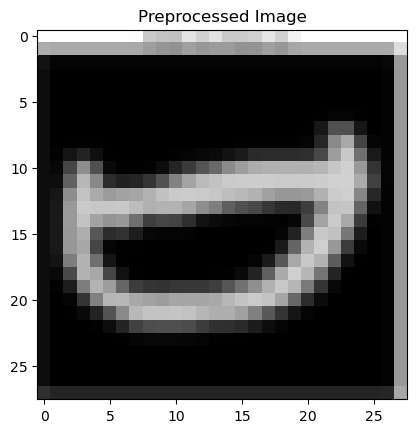

In [49]:
import matplotlib.pyplot as plt

plt.imshow(preprocessed_image.squeeze().numpy(), cmap='gray')
plt.title("Preprocessed Image")
plt.show()


In [50]:
# Step 4: Perform Prediction
with torch.no_grad():
    output = model(preprocessed_image)  # Forward pass
    probabilities = F.softmax(output, dim=1)  # Convert logits to probabilities
    predicted_class = torch.argmax(probabilities, dim=1).item()


# Step 5: Map Class Index to Character
class_to_char_map = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4',
    5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E',
    15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J',
    20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O',
    25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T',
    30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y',
    35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd',
    40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i',
    45: 'j', 46: 'k'
}


In [51]:

predicted_character = class_to_char_map.get(predicted_class, "Unknown")
print(f"Predicted Class Index: {predicted_class}")
print(f"The predicted character is: {predicted_character}")

Predicted Class Index: 13
The predicted character is: D


tensor(0.1751) tensor(0.3332)


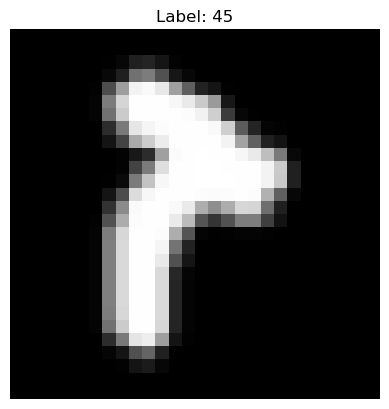

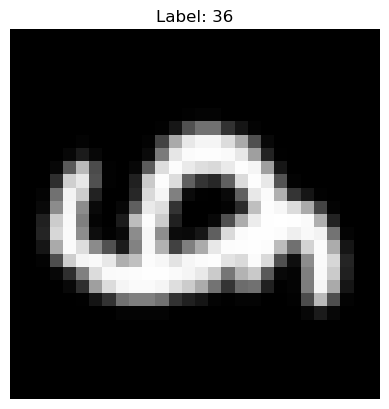

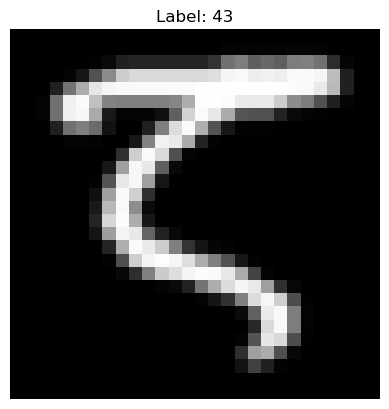

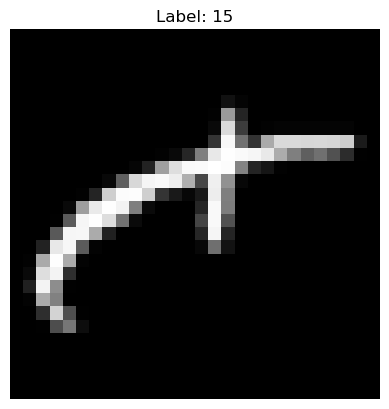

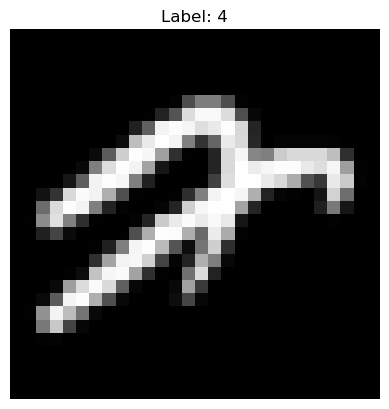

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn,optim
import torchvision
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset


raw_train_data = datasets.EMNIST(root="data", split="balanced", train=True, download=False)

#compute mean and std for normalization
mean = raw_train_data.data.float().mean() / 255
std = raw_train_data.data.float().std() / 255

print(mean,std)
#Prepare Data
batch_size=64

transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=[mean], std=[std])])

train_set=datasets.EMNIST(root='./data', split='balanced', download=False,train=True,transform=transform)
train_data=DataLoader(train_set,batch_size=batch_size,shuffle=True)

val_set=datasets.EMNIST(root='./data', split='balanced', download=False,transform=transform)
val_data=DataLoader(val_set,batch_size=batch_size)


import matplotlib.pyplot as plt

# Display the first few samples and their labels
for i in range(5):  # Adjust the range to display more samples
    image, label = train_set[i]  # Access the ith sample
    plt.imshow(image.squeeze(), cmap='gray')  # Remove the extra channel for grayscale
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()
